In [1]:
%matplotlib inline
import readline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from scipy import stats

In [2]:
robjects.r['load']('data.RData')
data = pd.Series(np.array(robjects.r['data']))

In [3]:
data.head()

0    2.0
1    2.0
2    4.0
3    6.0
4    4.0
dtype: float64

In [4]:
len(data)

50

In [5]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

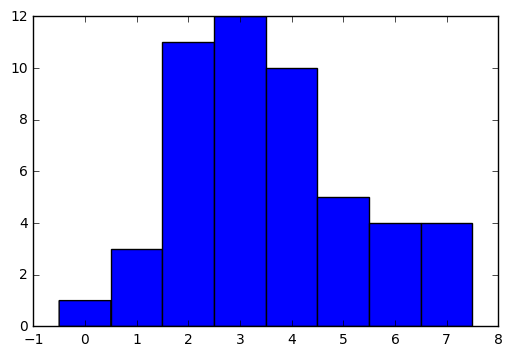

In [6]:
plt.hist(data,bins=np.arange(-0.5,8.5,1.0))
plt.show()

In [7]:
data.var()

2.986122448979592

In [8]:
data.std()

1.728040060004279

In [9]:
x = np.arange(0,10)
prob = pd.Series(stats.poisson.pmf(x,3.56),index=x)

In [10]:
prob

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64

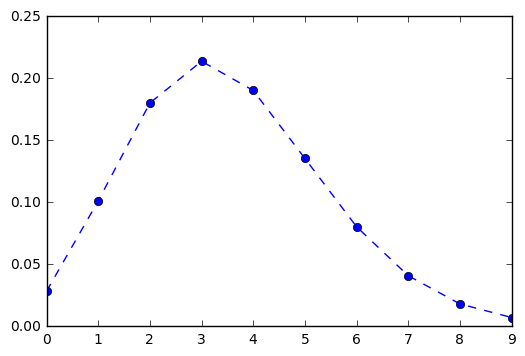

In [13]:
plt.plot(prob,'o--')

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

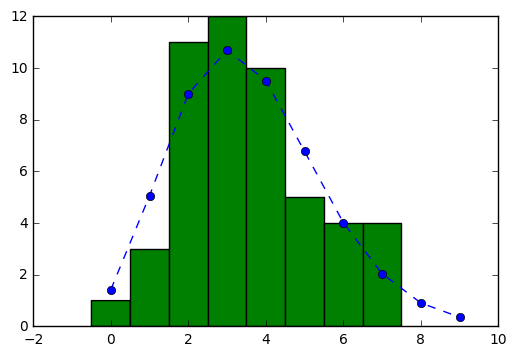

In [15]:
plt.plot(prob*50,'o--')
plt.hist(data,bins=np.arange(-0.5,8.5,1.0))

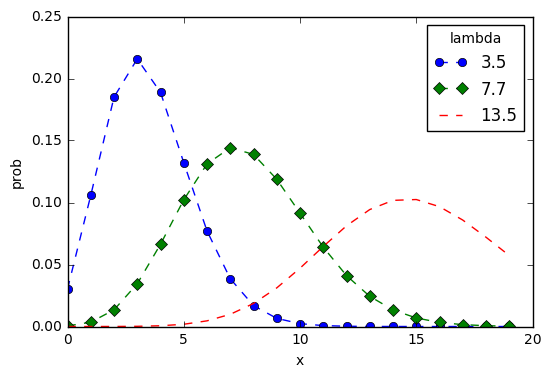

In [18]:
x = np.arange(0,20)
plt.plot(pd.Series(stats.poisson.pmf(x,3.5),index=x),'o--',label=3.5)
plt.plot(pd.Series(stats.poisson.pmf(x,7.7),index=x),'D--',label=7.7)
plt.plot(pd.Series(stats.poisson.pmf(x,15.1),index=x),'--',label=13.5)
plt.legend(loc='upper right',title='lambda')
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

In [24]:
t_lambda = [2.0,2.4,2.8,3.2,3.6,4.0,4.4,4.8,5.2]

In [44]:
pieces = []
for lam in t_lambda:
    data = pd.Series(stats.poisson.pmf(x,lam),index=x,name='lambda_%s'%lam)*50 
    pieces.append(data)

In [45]:
dd = pd.concat(pieces,axis=1)

In [46]:
dd.head()

,lambda_2.0,lambda_2.4,lambda_2.8,lambda_3.2,lambda_3.6,lambda_4.0,lambda_4.4,lambda_4.8,lambda_5.2
0,6.766764,4.535898,3.040503,2.038110,1.366186,0.915782,0.613867,0.411487,0.275828
1,13.533528,10.886154,8.513409,6.521953,4.918270,3.663128,2.701015,1.975139,1.434307
2,13.533528,13.063385,11.918772,10.435124,8.852886,7.326256,5.942233,4.740334,3.729198
3,9.022352,10.450708,11.124187,11.130799,10.623463,9.768341,8.715274,7.584535,6.463942
4,4.511176,6.270425,7.786931,8.904639,9.561117,9.768341,9.586802,9.101442,8.403125


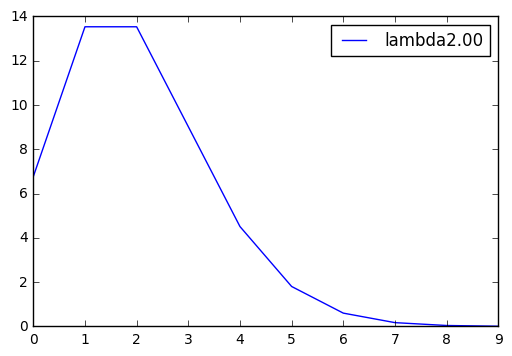

In [54]:
dd['lambda_2.0'].plot(label='lambda%.2f' %2.0)
plt.legend(loc='upper right')

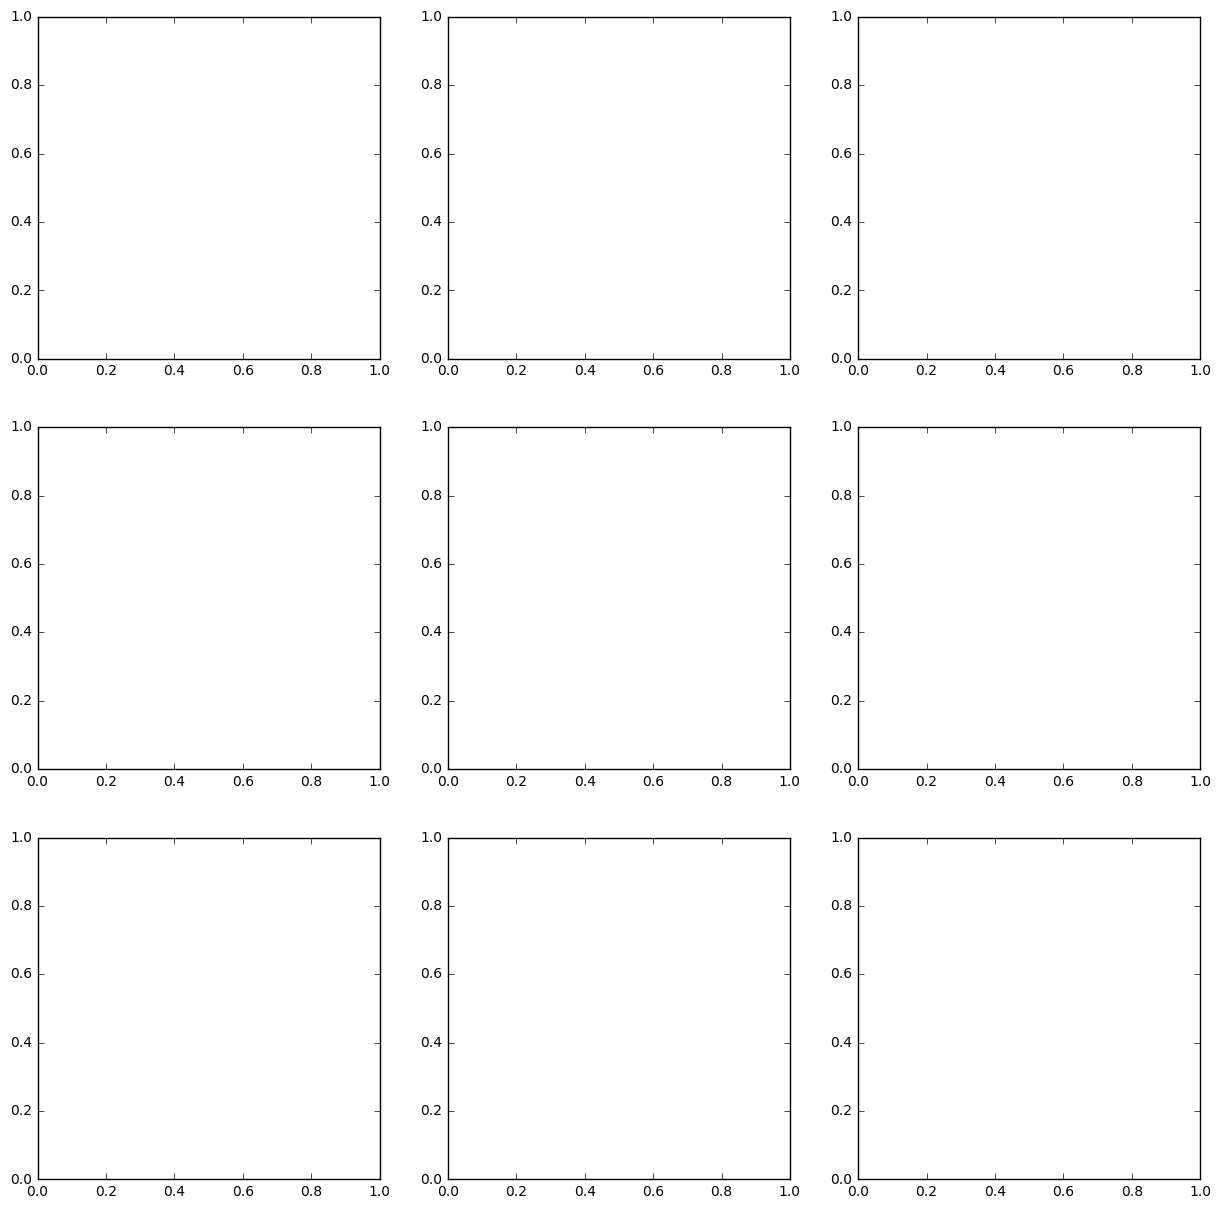

In [23]:
 = np.arange(0,10)

fig,axes = plt.subplots(3,3,figsize=(15,15))
dd.plot(kind='hist')

In [20]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])